In [1]:
# Import liabraries

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import re 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install autoscraper

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=7747f8864e127b95f369d46edaf7d4031db1a340bec60e05a7d41eb310bf1763
  Stored in directory: c:\users\manasi pawar\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


In [5]:
from autoscraper import AutoScraper

In [8]:
amazon_url1 = "https://www.amazon.in/Apple-Watch-GPS-Cellular-44mm/product-reviews/B09G9H7FNX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

wanted_list1 = ["Look was amazing it’s so much better."]

scraper = AutoScraper()

result1 = scraper.build(amazon_url1, wanted_list1)
print(result1)

["Writing this review after 2 days.The watch is great overall but lack 2 very basic features in my opinion.First is the always on display which could have been there since there is OLED display , it is just a software thing. I tried to find ways on the internet to turn on always on display but couldn't find anything.Second feature missing is the blood oxygen sensor which I feel should have been there given the price point. Even smart bands which costs 3k have blood oxygen sensor.Apple has reserved the above 2 features along with some other things as well for the premium watch models.Apart from the 2 features mentioned above , the watch is really great.Feels very premium on hand as does every other Apple product.The display is very smooth to touch and has rounded bezels which give a modern look.I'm a person who uses every Apple device such as Macbook , iPhone , iPad and Airpods along with apple services like apple music and stuff.So for me , this is the perfect watch.It is also my very 

In [10]:
df1 = pd.DataFrame()
df1['Reviews'] = result
df1

,Reviews
0,Writing this review after 2 days.The watch is ...
1,Look was amazing it’s so much better.
2,Writing review after 2 months :Value for money...
3,My Review after using it for 3 months:This is ...
4,Excellent but expensive
5,I don’t like carrying my phone everywhere and ...
6,Very happy with productArrived early thanx to ...
7,"The watch looks stunning no doubt, but it's so..."
8,"i got it just for 24.5k with cashback, i thank..."
9,Good product and reliable supplier


In [9]:
amazon_url2 = "https://www.amazon.in/Apple-Watch-GPS-Cellular-44mm/product-reviews/B09G9H7FNX/ref=cm_cr_arp_d_viewpnt_rgt?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=critical"

wanted_list2 = ["Many feature missing try to purchase letest model"]

scraper = AutoScraper()

result2 = scraper.build(amazon_url2, wanted_list2)
print(result2)

['Many feature missing try to purchase letest model', 'Just like other apple productsNot value for moneyIf the price was around 20k then it would have a worth productOver priced hyped apple product ,thts it', 'Cane with a defected strap and amazon doesnt want to replace or refund after a dozen calls and directing me to apple ! Apple says talk to amazon and ita been of no help .As for the watch auto sleep tracking and basic features its lacking . Otherwise product is fine . But I’d advice not to buy apple products from amazon', "The Watch looks good, feels good to wear, but just for the show. When I started it and paired, it kept unparing itself from my iPhone and when I made calls to check it abruptly restarts. It's defective on arrival, gets off when i remove it from charge. Feeling cheated by Amazon as I want a replacement and they are not ready within the legally 10-days Replacement policy. Please help!!", 'Basic watch', 'Most of the apps from App Store not supported. You need iPhon

In [11]:
df2 = pd.DataFrame()
df2['Reviews'] = result2
df2

,Reviews
0,Many feature missing try to purchase letest model
1,Just like other apple productsNot value for mo...
2,Cane with a defected strap and amazon doesnt w...
3,"The Watch looks good, feels good to wear, but ..."
4,Basic watch
5,Most of the apps from App Store not supported....
6,The media could not be loaded.\n ...
7,The media could not be loaded.\n ...
8,I am purchasing this watch revived on 22/09/2...
9,Slow processor and battery drain fast. Totally...


In [12]:
df2.drop(labels = [6,7], axis = 0, inplace = True)
df2.reset_index(drop = True, inplace = True)
df2

,Reviews
0,Many feature missing try to purchase letest model
1,Just like other apple productsNot value for mo...
2,Cane with a defected strap and amazon doesnt w...
3,"The Watch looks good, feels good to wear, but ..."
4,Basic watch
5,Most of the apps from App Store not supported....
6,I am purchasing this watch revived on 22/09/2...
7,Slow processor and battery drain fast. Totally...
8,Writing this review after 2 days.The watch is ...


In [13]:
data = pd.concat([df1, df2])
data.reset_index(drop = True, inplace = True)
data

,Reviews
0,Writing this review after 2 days.The watch is ...
1,Look was amazing it’s so much better.
2,Writing review after 2 months :Value for money...
3,My Review after using it for 3 months:This is ...
4,Excellent but expensive
5,I don’t like carrying my phone everywhere and ...
6,Very happy with productArrived early thanx to ...
7,"The watch looks stunning no doubt, but it's so..."
8,"i got it just for 24.5k with cashback, i thank..."
9,Good product and reliable supplier


In [14]:
data[data.duplicated(keep = False)]

,Reviews
0,Writing this review after 2 days.The watch is ...
18,Writing this review after 2 days.The watch is ...


In [15]:
data.drop_duplicates(keep = 'first', inplace = True)
data

,Reviews
0,Writing this review after 2 days.The watch is ...
1,Look was amazing it’s so much better.
2,Writing review after 2 months :Value for money...
3,My Review after using it for 3 months:This is ...
4,Excellent but expensive
5,I don’t like carrying my phone everywhere and ...
6,Very happy with productArrived early thanx to ...
7,"The watch looks stunning no doubt, but it's so..."
8,"i got it just for 24.5k with cashback, i thank..."
9,Good product and reliable supplier


In [16]:
# Remove special characters, symbols, punctuations

In [17]:
data['Cleaned'] = data['Reviews'].str.replace("[^a-zA-Z]", " ")
data

,Reviews,Cleaned
0,Writing this review after 2 days.The watch is ...,Writing this review after days The watch is ...
1,Look was amazing it’s so much better.,Look was amazing it s so much better
2,Writing review after 2 months :Value for money...,Writing review after months Value for money...
3,My Review after using it for 3 months:This is ...,My Review after using it for months This is ...
4,Excellent but expensive,Excellent but expensive
5,I don’t like carrying my phone everywhere and ...,I don t like carrying my phone everywhere and ...
6,Very happy with productArrived early thanx to ...,Very happy with productArrived early thanx to ...
7,"The watch looks stunning no doubt, but it's so...",The watch looks stunning no doubt but it s so...
8,"i got it just for 24.5k with cashback, i thank...",i got it just for k with cashback i thank...
9,Good product and reliable supplier,Good product and reliable supplier


In [18]:
# Text normalization

In [19]:
data['Cleaned'] = data['Cleaned'].apply(lambda x: ' '.join(i.lower() for i in x.split()))
data

,Reviews,Cleaned
0,Writing this review after 2 days.The watch is ...,writing this review after days the watch is gr...
1,Look was amazing it’s so much better.,look was amazing it s so much better
2,Writing review after 2 months :Value for money...,writing review after months value for money an...
3,My Review after using it for 3 months:This is ...,my review after using it for months this is be...
4,Excellent but expensive,excellent but expensive
5,I don’t like carrying my phone everywhere and ...,i don t like carrying my phone everywhere and ...
6,Very happy with productArrived early thanx to ...,very happy with productarrived early thanx to ...
7,"The watch looks stunning no doubt, but it's so...",the watch looks stunning no doubt but it s so ...
8,"i got it just for 24.5k with cashback, i thank...",i got it just for k with cashback i thank amaz...
9,Good product and reliable supplier,good product and reliable supplier


In [20]:
# stopwords

In [23]:
with open('stop.txt', 'r') as stop: 
    stop_words = stop.read().split('\n')
stop_words

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [22]:
# Positive words

In [24]:
with open('positive-words.txt', 'r') as pos_word:
    Positive_words = pos_word.read().split('\n')
Positive_words

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Positive',
 ';',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an opi

In [25]:
# Negative words

In [26]:
with open('negative-words.txt', 'r') as neg_words:
    Negative_words = neg_words.read().split('\n')
Negative_words

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Negative',
 ';',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an o

In [27]:
# Remove stopwords

In [28]:
data['Cleaned'] = data['Cleaned'].apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))
data

,Reviews,Cleaned
0,Writing this review after 2 days.The watch is ...,writing review days watch great lack basic fea...
1,Look was amazing it’s so much better.,amazing
2,Writing review after 2 months :Value for money...,writing review months money esim works great p...
3,My Review after using it for 3 months:This is ...,review months smart watch segment worth buying...
4,Excellent but expensive,excellent expensive
5,I don’t like carrying my phone everywhere and ...,don carrying phone time don miss calls comprom...
6,Very happy with productArrived early thanx to ...,happy productarrived early amazon
7,"The watch looks stunning no doubt, but it's so...",watch stunning doubt prone scratches dust care...
8,"i got it just for 24.5k with cashback, i thank...",cashback amazon giving great deal watch works ...
9,Good product and reliable supplier,good product reliable supplier


In [29]:
# Lemmetization

In [30]:
lemma = WordNetLemmatizer()

data['Cleaned'] = data['Cleaned'].apply(lambda x: ' '.join(lemma.lemmatize(w) for w in x.split()))
data

,Reviews,Cleaned
0,Writing this review after 2 days.The watch is ...,writing review day watch great lack basic feat...
1,Look was amazing it’s so much better.,amazing
2,Writing review after 2 months :Value for money...,writing review month money esim work great pre...
3,My Review after using it for 3 months:This is ...,review month smart watch segment worth buying ...
4,Excellent but expensive,excellent expensive
5,I don’t like carrying my phone everywhere and ...,don carrying phone time don miss call compromi...
6,Very happy with productArrived early thanx to ...,happy productarrived early amazon
7,"The watch looks stunning no doubt, but it's so...",watch stunning doubt prone scratch dust carefu...
8,"i got it just for 24.5k with cashback, i thank...",cashback amazon giving great deal watch work g...
9,Good product and reliable supplier,good product reliable supplier


In [31]:
# split words and calculate length of words

In [32]:
data['Split'] = data['Cleaned'].apply(lambda x: x.split())
data['Length'] = data['Cleaned'].apply(lambda x: len(x))
data

,Reviews,Cleaned,Split,Length
0,Writing this review after 2 days.The watch is ...,writing review day watch great lack basic feat...,"[writing, review, day, watch, great, lack, bas...",1804
1,Look was amazing it’s so much better.,amazing,[amazing],7
2,Writing review after 2 months :Value for money...,writing review month money esim work great pre...,"[writing, review, month, money, esim, work, gr...",294
3,My Review after using it for 3 months:This is ...,review month smart watch segment worth buying ...,"[review, month, smart, watch, segment, worth, ...",201
4,Excellent but expensive,excellent expensive,"[excellent, expensive]",19
5,I don’t like carrying my phone everywhere and ...,don carrying phone time don miss call compromi...,"[don, carrying, phone, time, don, miss, call, ...",238
6,Very happy with productArrived early thanx to ...,happy productarrived early amazon,"[happy, productarrived, early, amazon]",33
7,"The watch looks stunning no doubt, but it's so...",watch stunning doubt prone scratch dust carefu...,"[watch, stunning, doubt, prone, scratch, dust,...",247
8,"i got it just for 24.5k with cashback, i thank...",cashback amazon giving great deal watch work g...,"[cashback, amazon, giving, great, deal, watch,...",50
9,Good product and reliable supplier,good product reliable supplier,"[good, product, reliable, supplier]",30


In [34]:
# Positive words counts in reviews

pos_num = data['Split'].map(lambda x: len([i for i in x if i in Positive_words]))
data['pos_count'] = pos_num

# Negative words counts in reviews

neg_num = data['Split'].map(lambda x: len([i for i in x if i in Negative_words]))
data['neg_count'] = neg_num

# Praportion of positive and negative words present in reviews

data['Sentiment'] = round((data['pos_count'] - data['neg_count']) / data['Length'], 2)

# Final data
data

,Reviews,Cleaned,Split,Length,pos_count,neg_count,Sentiment
0,Writing this review after 2 days.The watch is ...,writing review day watch great lack basic feat...,"[writing, review, day, watch, great, lack, bas...",1804,30,5,0.01
1,Look was amazing it’s so much better.,amazing,[amazing],7,1,0,0.14
2,Writing review after 2 months :Value for money...,writing review month money esim work great pre...,"[writing, review, month, money, esim, work, gr...",294,5,0,0.02
3,My Review after using it for 3 months:This is ...,review month smart watch segment worth buying ...,"[review, month, smart, watch, segment, worth, ...",201,2,1,0.00
4,Excellent but expensive,excellent expensive,"[excellent, expensive]",19,1,1,0.00
5,I don’t like carrying my phone everywhere and ...,don carrying phone time don miss call compromi...,"[don, carrying, phone, time, don, miss, call, ...",238,2,2,0.00
6,Very happy with productArrived early thanx to ...,happy productarrived early amazon,"[happy, productarrived, early, amazon]",33,1,0,0.03
7,"The watch looks stunning no doubt, but it's so...",watch stunning doubt prone scratch dust carefu...,"[watch, stunning, doubt, prone, scratch, dust,...",247,4,5,-0.00
8,"i got it just for 24.5k with cashback, i thank...",cashback amazon giving great deal watch work g...,"[cashback, amazon, giving, great, deal, watch,...",50,4,0,0.08
9,Good product and reliable supplier,good product reliable supplier,"[good, product, reliable, supplier]",30,2,0,0.07


In [35]:
# Classification of reviews based on sentiments

In [36]:
Class = []

for i in data['Sentiment']:
    if i > 0:
        Class.append('Positive')
    elif i < 0:
        Class.append('Negative')
    else:
        Class.append('Neutral')

In [37]:
data['Class'] = Class
data

,Reviews,Cleaned,Split,Length,pos_count,neg_count,Sentiment,Class
0,Writing this review after 2 days.The watch is ...,writing review day watch great lack basic feat...,"[writing, review, day, watch, great, lack, bas...",1804,30,5,0.01,Positive
1,Look was amazing it’s so much better.,amazing,[amazing],7,1,0,0.14,Positive
2,Writing review after 2 months :Value for money...,writing review month money esim work great pre...,"[writing, review, month, money, esim, work, gr...",294,5,0,0.02,Positive
3,My Review after using it for 3 months:This is ...,review month smart watch segment worth buying ...,"[review, month, smart, watch, segment, worth, ...",201,2,1,0.00,Neutral
4,Excellent but expensive,excellent expensive,"[excellent, expensive]",19,1,1,0.00,Neutral
5,I don’t like carrying my phone everywhere and ...,don carrying phone time don miss call compromi...,"[don, carrying, phone, time, don, miss, call, ...",238,2,2,0.00,Neutral
6,Very happy with productArrived early thanx to ...,happy productarrived early amazon,"[happy, productarrived, early, amazon]",33,1,0,0.03,Positive
7,"The watch looks stunning no doubt, but it's so...",watch stunning doubt prone scratch dust carefu...,"[watch, stunning, doubt, prone, scratch, dust,...",247,4,5,-0.00,Neutral
8,"i got it just for 24.5k with cashback, i thank...",cashback amazon giving great deal watch work g...,"[cashback, amazon, giving, great, deal, watch,...",50,4,0,0.08,Positive
9,Good product and reliable supplier,good product reliable supplier,"[good, product, reliable, supplier]",30,2,0,0.07,Positive


In [38]:
# Feature Extraction

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tfidf = TfidfVectorizer()

x = tfidf.fit_transform(data['Cleaned'])
x.toarray()

array([[0.        , 0.04537133, 0.04537133, ..., 0.03971312, 0.04537133,
        0.04537133],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.11132122, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [41]:
tfidf.get_feature_names_out()

array(['abruptly', 'accurate', 'accurately', 'advice', 'airpods',
       'airtel', 'amazing', 'amazon', 'app', 'apple', 'application',
       'apps', 'arrival', 'auto', 'automatically', 'bad', 'band', 'basic',
       'battery', 'bezel', 'blood', 'bluetooth', 'buy', 'buying', 'call',
       'camera', 'cane', 'car', 'care', 'careful', 'carrying', 'cashback',
       'cellular', 'charge', 'charging', 'cheated', 'check', 'cisco',
       'click', 'combined', 'comfortable', 'compatible', 'compromise',
       'connected', 'contacting', 'continue', 'control', 'convert',
       'cost', 'couldn', 'daily', 'day', 'deal', 'decent', 'defected',
       'defective', 'depend', 'device', 'didn', 'directing', 'discount',
       'dismissed', 'display', 'doesn', 'doesnt', 'don', 'doubt',
       'download', 'dozen', 'drain', 'dual', 'dust', 'earlier', 'early',
       'easy', 'email', 'enabling', 'esim', 'esims', 'everyday',
       'excellent', 'expect', 'expensive', 'experience', 'extensively',
       'fast

In [42]:
tfidf.vocabulary_

{'writing': 291,
 'review': 218,
 'day': 51,
 'watch': 279,
 'great': 102,
 'lack': 127,
 'basic': 17,
 'feature': 86,
 'opinion': 172,
 'display': 62,
 'oled': 170,
 'software': 240,
 'thing': 260,
 'find': 91,
 'way': 281,
 'internet': 122,
 'turn': 267,
 'couldn': 49,
 'missing': 156,
 'blood': 20,
 'oxygen': 176,
 'sensor': 230,
 'feel': 87,
 'price': 193,
 'point': 186,
 'smart': 238,
 'band': 16,
 'cost': 48,
 'apple': 9,
 'reserved': 216,
 'premium': 191,
 'model': 157,
 'mentioned': 151,
 'hand': 106,
 'product': 197,
 'smooth': 239,
 'touch': 264,
 'rounded': 221,
 'bezel': 19,
 'give': 97,
 'modern': 158,
 'person': 180,
 'device': 57,
 'macbook': 143,
 'iphone': 124,
 'ipad': 123,
 'airpods': 4,
 'service': 231,
 'music': 163,
 'stuff': 249,
 'perfect': 179,
 'mention': 150,
 'learning': 130,
 'watchos': 280,
 'super': 251,
 'easy': 74,
 'interface': 121,
 'lag': 129,
 'processor': 196,
 'fast': 85,
 'combined': 39,
 'gb': 96,
 'storage': 246,
 'offer': 169,
 'experience': 8

In [43]:
df = pd.DataFrame(x.toarray(), columns = tfidf.get_feature_names_out())
df['Class'] = Class
df

,abruptly,accurate,accurately,advice,airpods,airtel,amazing,amazon,app,apple,...,won,work,workout,worry,worst,worth,writing,wynk,youtube,Class
0,0.000000,0.045371,0.045371,0.000000,0.045371,0.039713,0.0,0.055778,0.039713,0.223114,...,0.039713,0.065169,0.039713,0.045371,0.000000,0.000000,0.039713,0.045371,0.045371,Positive
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Positive
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.111321,0.274017,0.000000,0.000000,0.000000,0.000000,0.111321,0.000000,0.000000,Positive
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.182111,0.000000,0.000000,0.182111,0.000000,0.000000,0.000000,Neutral
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.334453,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Positive
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.312039,0.0,0.000000,0.000000,0.109567,...,0.000000,0.128014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.239337,0.000000,0.000000,...,0.000000,0.279631,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Positive
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Positive


In [44]:
x = df.iloc[:, 0:-1]
y = df['Class']

In [45]:
# Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()

In [48]:
y = le.fit_transform(y)
y

array([2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0])

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
xtrain ,xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [51]:
# Model building

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [53]:
# Logistic Regression model

In [54]:
lr = LogisticRegression()

lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)

print(classification_report(ytest, ypred))

print('Training Accuracy: ', lr.score(xtrain, ytrain))
print('Testing Accuracy: ', lr.score(xtest, ytest))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

Training Accuracy:  0.8571428571428571
Testing Accuracy:  0.75


In [55]:
print(ytest)
print(ypred)

[2 1 1 2]
[2 1 1 1]


In [56]:
# Decision tree model

In [57]:
dt = DecisionTreeClassifier()

dt.fit(xtrain, ytrain)
ypred1 = dt.predict(xtest)

print(classification_report(ytest, ypred1))

print('Training Accuracy: ', dt.score(xtrain, ytrain))
print('Testing Accuracy: ', dt.score(xtest, ytest))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         2
           2       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4

Training Accuracy:  1.0
Testing Accuracy:  0.5


In [58]:
print(ytest)
print(ypred1)

[2 1 1 2]
[1 1 1 1]


In [59]:
# Wordcloud

In [60]:
from wordcloud import WordCloud, STOPWORDS

In [61]:
# All words present in reviews

In [62]:
reviews = ' '.join(data['Cleaned'])
reviews

'writing review day watch great lack basic feature opinion display oled display software thing find way internet turn display couldn find feature missing blood oxygen sensor feel price point smart band cost blood oxygen sensor apple reserved feature thing premium watch model feature mentioned watch great feel premium hand apple product display smooth touch rounded bezel give modern person apple device macbook iphone ipad airpods apple service apple music stuff perfect watch smart watch mention learning watchos super easy interface super smooth lag processor fast combined gb storage offer great experience thing cellular model work postpaid sim prepaid sim convert postpaid postpaid number work airtel jio esim receive call watch connected phone bluetooth tested call quality good thing stand experience good haptics watch feel poking totally vibration ll love haptics watch moving fitness tracking sleep tracking heart tracking gym everyday measured workout accurately heart rate sensor good s

In [63]:
# Frequency of words present in review

(-0.5, 2999.5, 1999.5, -0.5)

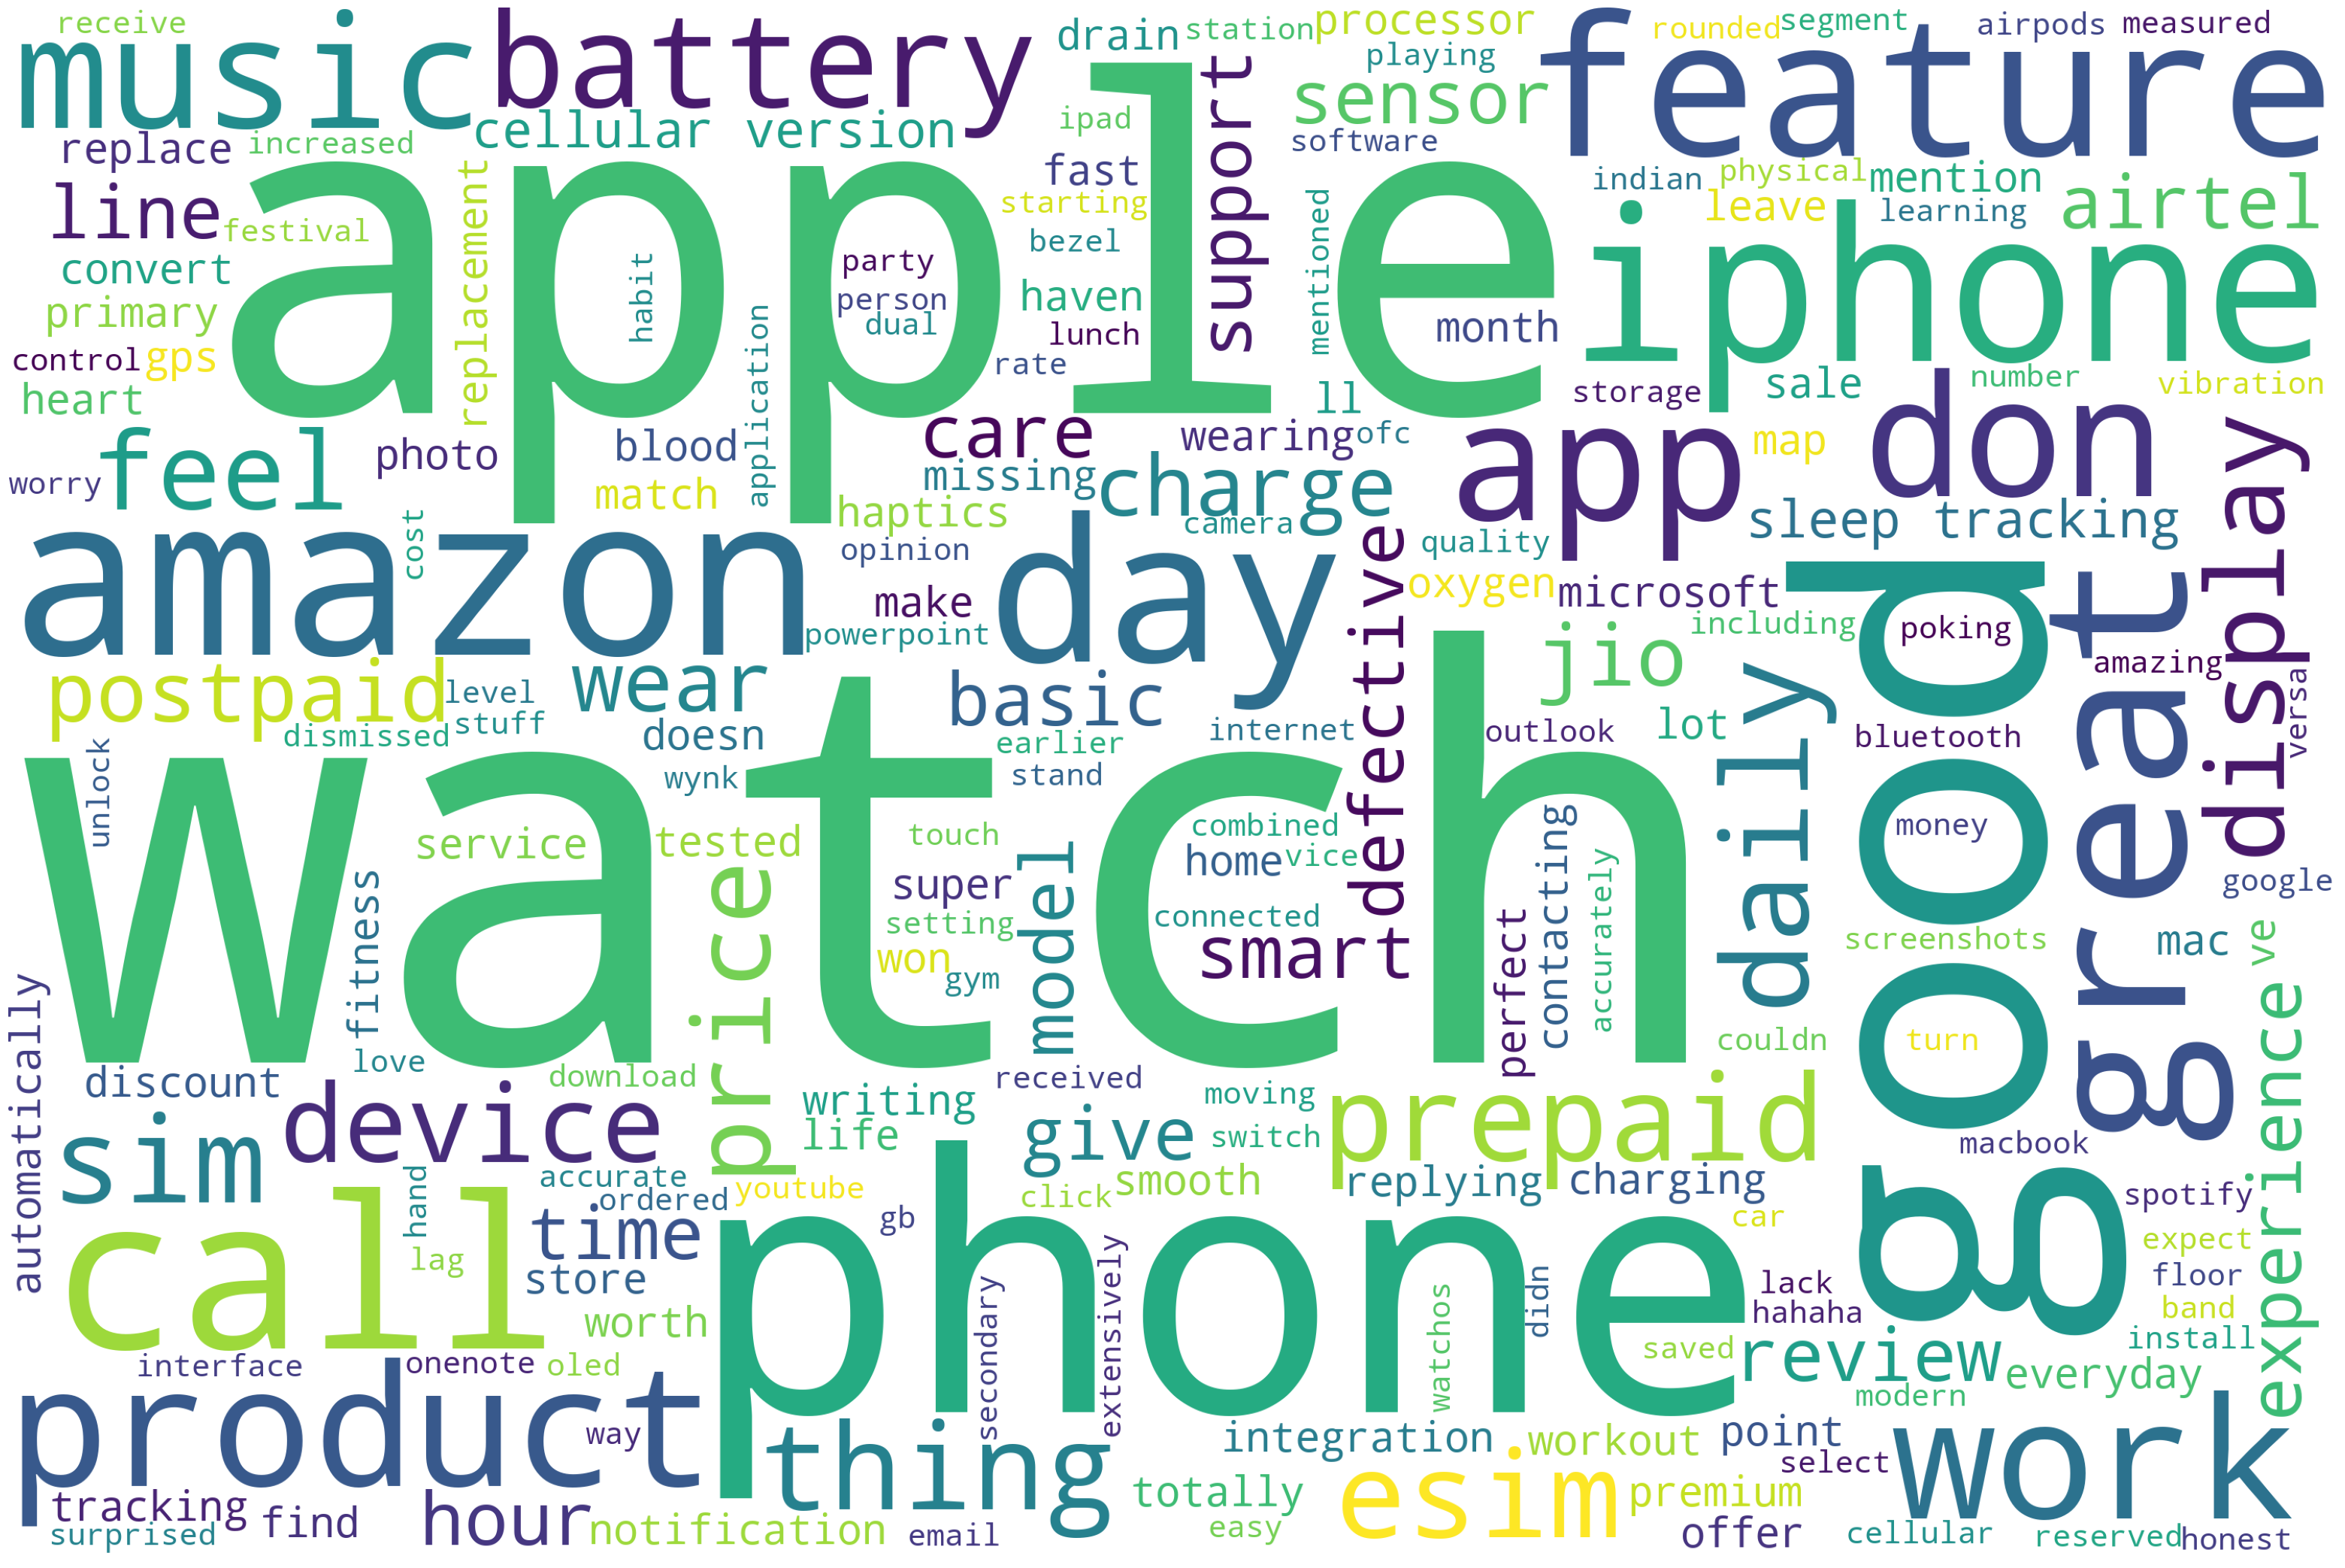

In [66]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'white', stopwords = STOPWORDS).generate(reviews)
plt.figure(figsize = (40,30))
plt.imshow(wordcloud)
plt.axis('off')